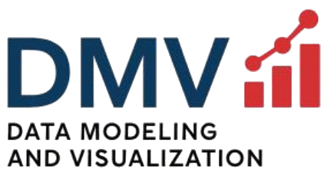

# **Grouping & Faceting, Radar Charts, Matrix Plots, Waffle Charts, and Steam Graph**

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from plotnine import ggplot, aes, geom_bar, facet_wrap, theme_bw, labs

Let's load the dataset

In [2]:
# Load datasets
tips = sns.load_dataset("tips")


# **1. Grouping vs Faceting**

* Both are ways to visualize subgroups of data.

* **Grouping**: show multiple categories on the same plot, usually by color, shape, size.

* **Faceting**: split data into small multiples (subplots), each showing one category.



|          | Grouping                                                                    | Faceting                                                               |
| -------- | --------------------------------------------------------------------------- | ---------------------------------------------------------------------- |
| What?    | Combine categories into *one* plot, using color/shape/size to separate them | Split data into *multiple* small plots (panels), each showing a subset |
| Good for | Comparing categories in the *same coordinate space*                         | Seeing patterns separately, esp. when plots overlap                    |


Typical use cases:

* Grouping: quick comparison of distributions, trends.

* Faceting: compare patterns when data points would overlap badly in one plot.

## **1.1 Grouping**

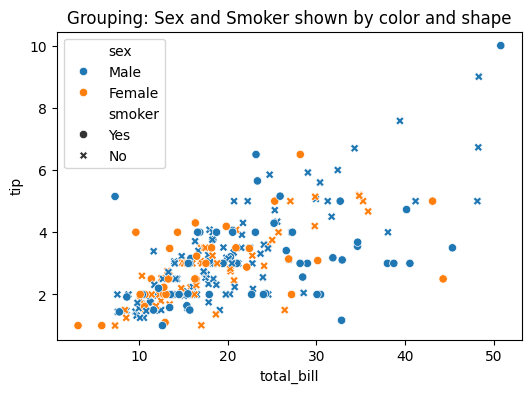

In [3]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="sex", style="smoker")
plt.title("Grouping: Sex and Smoker shown by color and shape")
plt.show()

## **1.2 Faceting**

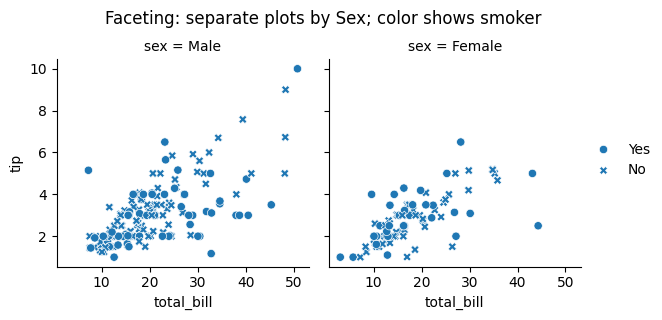

In [4]:
g = sns.FacetGrid(tips, col="sex")
g.map_dataframe(sns.scatterplot, x="total_bill", y="tip", style="smoker")
g.add_legend()
g.fig.suptitle("Faceting: separate plots by Sex; color shows smoker", y=1.05)
plt.show()


# **2. Variations of FacetGrid**

## **2.1: FacetGrid scatter**

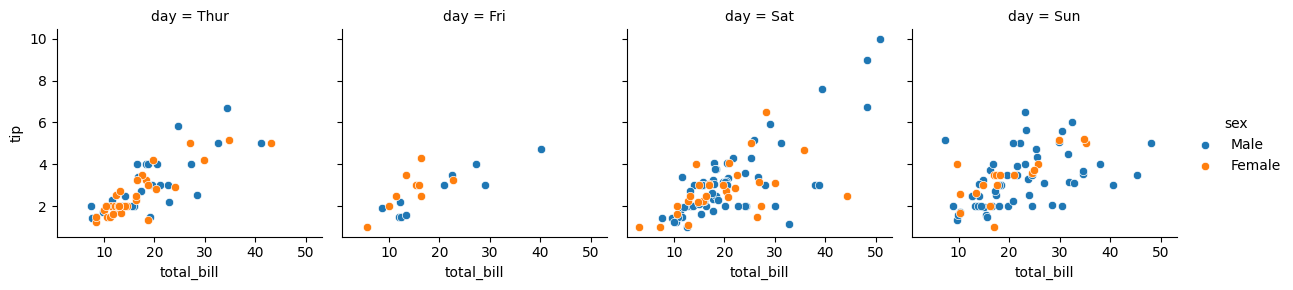

In [5]:
g = sns.FacetGrid(tips, col="day", hue="sex")
g.map_dataframe(sns.scatterplot, x="total_bill", y="tip")
g.add_legend()
plt.show()


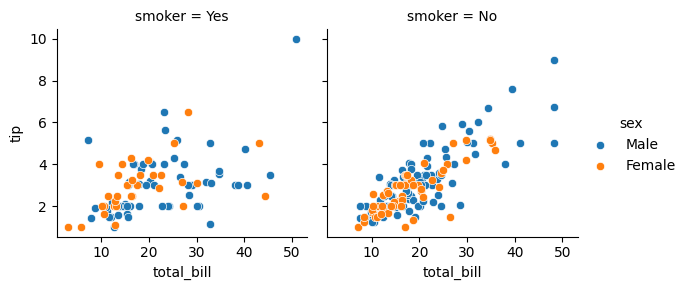

In [6]:
g = sns.FacetGrid(tips, col="smoker", hue="sex")
g.map_dataframe(sns.scatterplot, x="total_bill", y="tip")
g.add_legend()
plt.show()

## **2.2: FacetGrid Barplot**

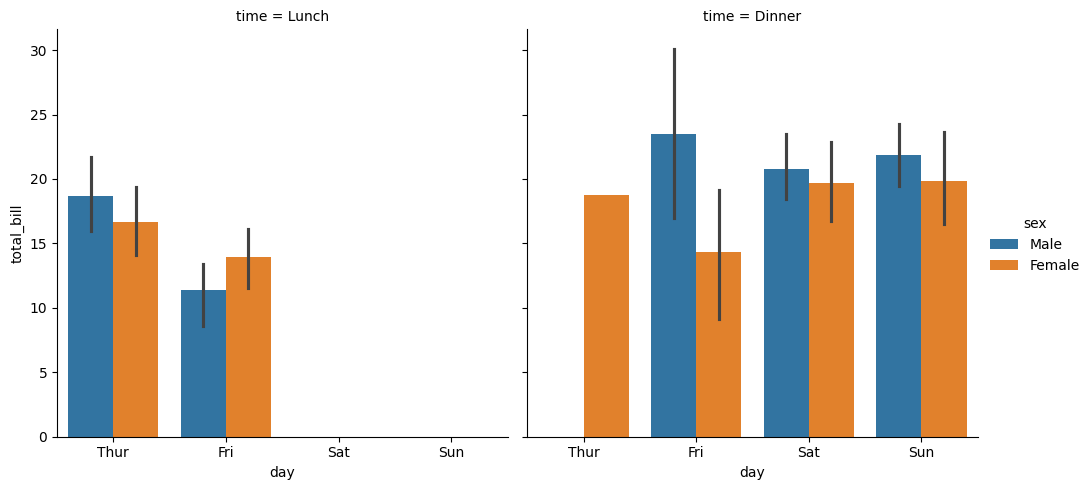

In [7]:
sns.catplot(data=tips, x="day", y="total_bill", hue="sex", col="time", kind="bar")
plt.show()


## **2.3: FacetGrid Histogram**

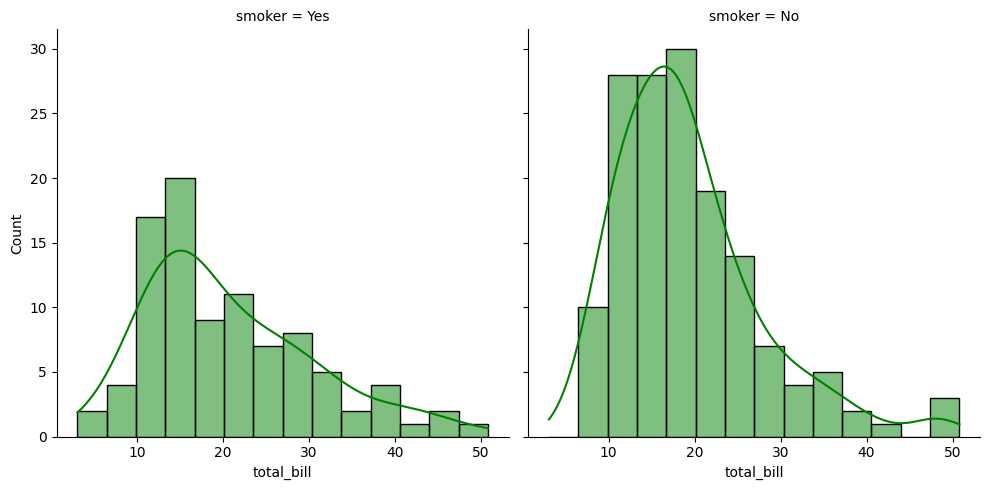

In [8]:
sns.displot(data=tips, x="total_bill", col="smoker", kde=True, color="green")
plt.show()


# **3. Radar Chart**

* A circular chart where each axis represents a variable.

* Useful to compare profiles across multiple variables.

Typical use cases:

* Compare products, teams, countries, etc., across multiple criteria.

* See strengths & weaknesses quickly.

### Let's load the FIFA data

In [9]:
# For using files stored in Google Drive
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive', force_remount=True)
# Now include the file path
folder_path = 'drive/MyDrive/DA209_DMV/'
file_name = 'fifa_data.csv'
output_plot = 'fifa.png'

Mounted at /content/drive


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load FIFA 19 dataset
df = pd.read_csv(folder_path+file_name)

# Basic check
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


### Let's consider a few skills

In [11]:
# We'll use these skills:
skills = ['Crossing', 'Finishing', 'ShortPassing', 'Dribbling', 'LongPassing', 'BallControl']

# Pick 5 famous players for example:
players = ['L. Messi', 'Cristiano Ronaldo', 'Neymar Jr', 'K. De Bruyne', 'Sergio Ramos']

# Subset data
df_players = df[df['Name'].isin(players)][['Name'] + skills].set_index('Name')
df_players


,Crossing,Finishing,ShortPassing,Dribbling,LongPassing,BallControl
Name,,,,,,
L. Messi,84.0,95.0,90.0,97.0,87.0,96.0
Cristiano Ronaldo,84.0,94.0,81.0,88.0,77.0,94.0
Neymar Jr,79.0,87.0,84.0,96.0,78.0,95.0
K. De Bruyne,93.0,82.0,92.0,86.0,91.0,91.0
Sergio Ramos,66.0,60.0,78.0,63.0,77.0,84.0


## **Define radar plot function**

In [12]:
def make_radar(player_name, values, labels, color='b'):
    N = len(labels)
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    values += values[:1]  # repeat first value
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))
    ax.plot(angles, values, color=color, linewidth=2)
    ax.fill(angles, values, color=color, alpha=0.25)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=9)
    ax.set_yticklabels([])
    plt.title(player_name, y=1.1, fontsize=14)
    plt.show()


### **Messi**

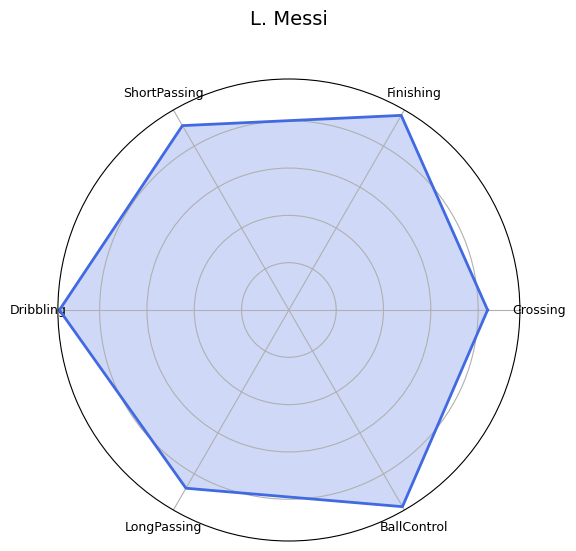

In [13]:
make_radar('L. Messi', df_players.loc['L. Messi', skills].tolist(), skills, color='royalblue')


### **Ronaldo**

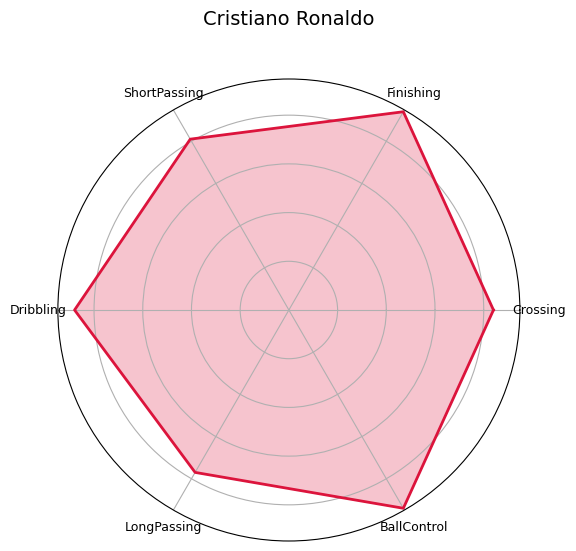

In [14]:
make_radar('Cristiano Ronaldo', df_players.loc['Cristiano Ronaldo', skills].tolist(), skills, color='crimson')


### **De Bryune**

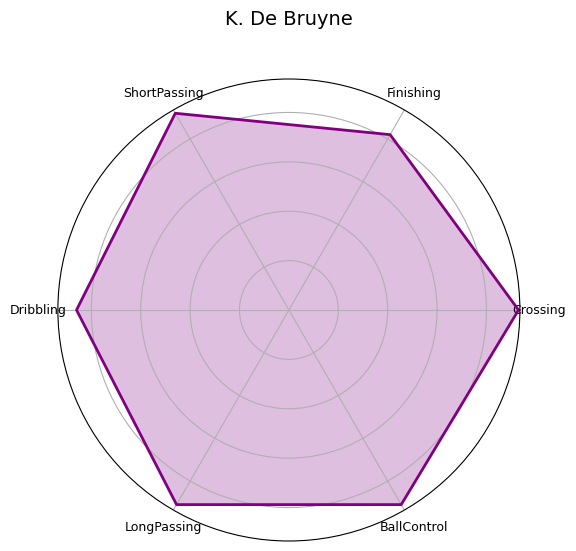

In [15]:
make_radar('K. De Bruyne', df_players.loc['K. De Bruyne', skills].tolist(), skills, color='purple')


### **Multiple players together**

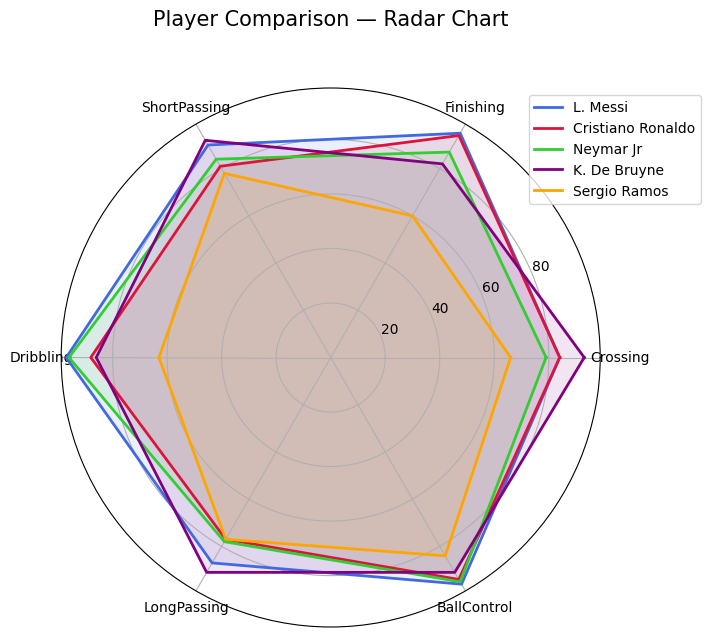

In [16]:
N = len(skills)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(7,7), subplot_kw=dict(polar=True))

colors = ['royalblue', 'crimson', 'limegreen', 'purple', 'orange']

for player, color in zip(players, colors):
    values = df_players.loc[player, skills].tolist()
    values += values[:1]
    ax.plot(angles, values, label=player, linewidth=2, color=color)
    ax.fill(angles, values, alpha=0.1, color=color)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(skills)
plt.title("Player Comparison — Radar Chart", y=1.1, fontsize=15)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()


## **What if we include a goal-keeper?**

In [17]:
# Pick 5 famous players for example:
players = ['L. Messi', 'Cristiano Ronaldo', 'De Gea', 'K. De Bruyne', 'Sergio Ramos']

# Subset data
df_players = df[df['Name'].isin(players)][['Name'] + skills].set_index('Name')
df_players


,Crossing,Finishing,ShortPassing,Dribbling,LongPassing,BallControl
Name,,,,,,
L. Messi,84.0,95.0,90.0,97.0,87.0,96.0
Cristiano Ronaldo,84.0,94.0,81.0,88.0,77.0,94.0
De Gea,17.0,13.0,50.0,18.0,51.0,42.0
K. De Bruyne,93.0,82.0,92.0,86.0,91.0,91.0
Sergio Ramos,66.0,60.0,78.0,63.0,77.0,84.0


## **Updated multiple players together**

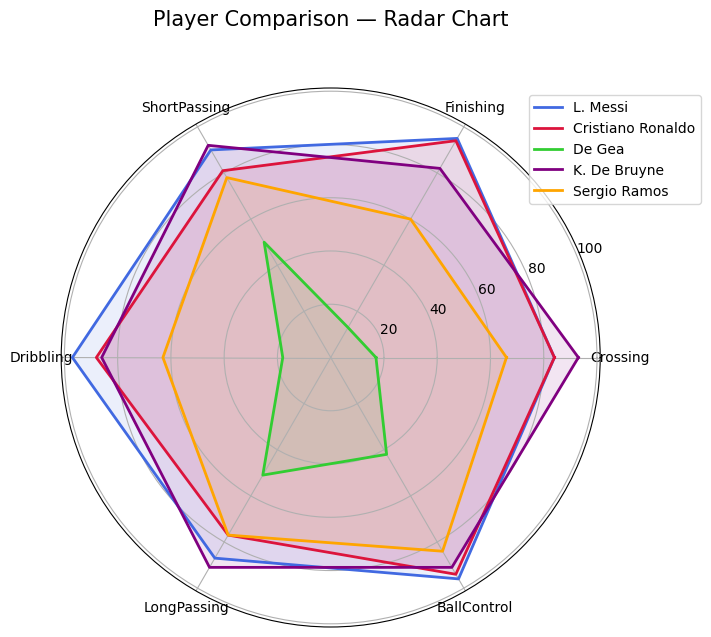

In [18]:
N = len(skills)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(7,7), subplot_kw=dict(polar=True))

colors = ['royalblue', 'crimson', 'limegreen', 'purple', 'orange']

for player, color in zip(players, colors):
    values = df_players.loc[player, skills].tolist()
    values += values[:1]
    ax.plot(angles, values, label=player, linewidth=2, color=color)
    ax.fill(angles, values, alpha=0.1, color=color)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(skills)
plt.title("Player Comparison — Radar Chart", y=1.1, fontsize=15)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()


# **4. Matrix Plot**

* Visualizes data as a grid (matrix) where color encodes the value.

* Commonly used for correlations, distances, frequencies.

Typical use cases:

* Correlation matrices between variables.

* Pivoted data like flights by month and year.

* Visualize missing data patterns.

In [19]:
# Using seaborn's flights dataset
flights = sns.load_dataset("flights").pivot(index="month", columns="year", values="passengers")


## **4.1 Heatmap**

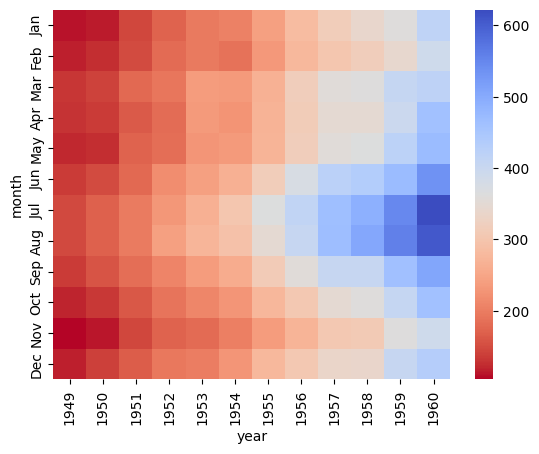

In [20]:
sns.heatmap(flights, cmap="coolwarm_r", annot=False)
plt.show()


## **4.2 Correlation plot**

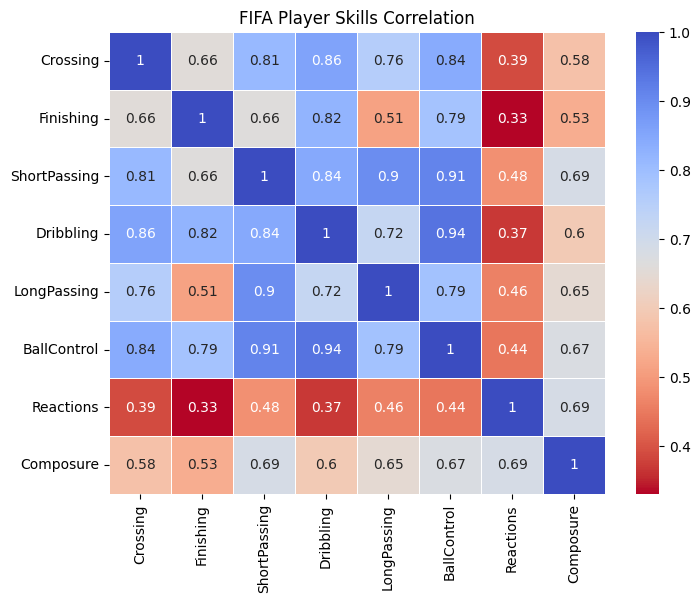

In [21]:
# Pick numeric columns
skills = ['Crossing', 'Finishing', 'ShortPassing', 'Dribbling', 'LongPassing', 'BallControl', 'Reactions', 'Composure']

# Compute correlation
corr = df[skills].corr()

# Plot
plt.figure(figsize=(8,6))
sns.heatmap(corr, cmap="coolwarm_r", linewidths=0.5, annot=True)
plt.title("FIFA Player Skills Correlation")
plt.show()



# **5. Waffle Chart**

* Grid of squares (or small rectangles) representing parts of a whole.

* Each block ≈ same value, so proportions are easy to compare.

Typical use cases:

* Show composition: population by continent, product market share, gender split.

* Visually striking alternative to pie/donut charts.

In [22]:
!pip install pywaffle
from pywaffle import Waffle

file_name = "gapminder.csv"

# Load gapminder dataset
gapminder_all = pd.read_csv(folder_path+file_name)

#Extract only 2007 data
gapminder = gapminder_all[gapminder_all['year'] == 2007]

# Basic check
gapminder.head()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.6/25.6 MB 74.5 MB/s eta 0:00:00


,country,continent,year,lifeExp,pop,gdpPercap
11,Afghanistan,Asia,2007,43.828,31889923,974.580338
23,Albania,Europe,2007,76.423,3600523,5937.029526
35,Algeria,Africa,2007,72.301,33333216,6223.367465
47,Angola,Africa,2007,42.731,12420476,4797.231267
59,Argentina,Americas,2007,75.320,40301927,12779.379640


## **5.1: Population by continent**

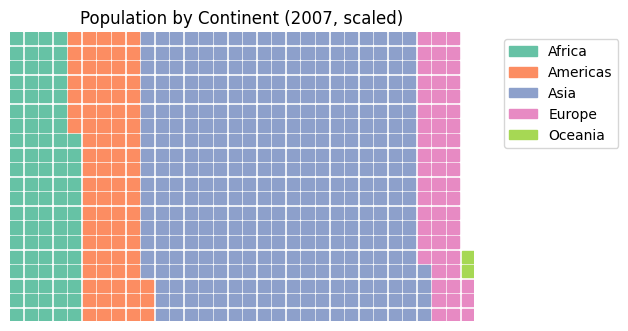

In [23]:
pop_by_continent = gapminder.groupby('continent')['pop'].sum()
pop_scaled = (pop_by_continent / 10**7).round().astype(int).to_dict()

fig = plt.figure(
    FigureClass=Waffle, rows=20, values=pop_scaled,
    title={'label': 'Population by Continent (2007, scaled)', 'loc': 'center'},
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.05, 1)}
)
plt.show()


## **5.2: Countries in Asia vs Others**

/tmp/ipython-input-24-2239295595.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


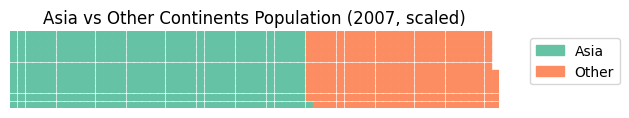

In [24]:
# Create new column
gapminder['is_asia'] = gapminder['continent'].apply(lambda x: 'Asia' if x=='Asia' else 'Other')

pop_by_group = gapminder.groupby('is_asia')['pop'].sum()
pop_scaled = (pop_by_group / 10**7).round().astype(int).to_dict()

fig = plt.figure(
    FigureClass=Waffle, rows=10, values=pop_scaled,
    title={'label': 'Asia vs Other Continents Population (2007, scaled)', 'loc': 'center'},
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.05, 1)}
)
plt.show()


## **5.3: GDP group (> median vs < median)**

/tmp/ipython-input-25-824396454.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


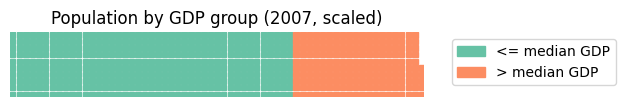

In [25]:
median_gdp = gapminder['gdpPercap'].median()

gapminder['gdp_group'] = gapminder['gdpPercap'].apply(lambda x: '> median GDP' if x>median_gdp else '<= median GDP')

pop_by_gdp = gapminder.groupby('gdp_group')['pop'].sum()
pop_scaled = (pop_by_gdp / 10**7).round().astype(int).to_dict()

fig = plt.figure(
    FigureClass=Waffle, rows=10, values=pop_scaled,
    title={'label': 'Population by GDP group (2007, scaled)', 'loc': 'center'},
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.05, 1)}
)
plt.show()


## **5.4: Africa vs Europe population**

/tmp/ipython-input-26-2079244104.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


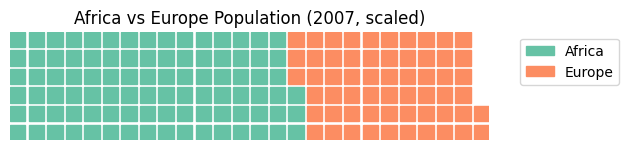

In [26]:
gapminder['africa_vs_europe'] = gapminder['continent'].apply(
    lambda x: 'Africa' if x=='Africa' else ('Europe' if x=='Europe' else 'Other')
)

pop_ae = gapminder[gapminder['africa_vs_europe'].isin(['Africa','Europe'])].groupby('africa_vs_europe')['pop'].sum()
pop_scaled = (pop_ae / 10**7).round().astype(int).to_dict()

fig = plt.figure(
    FigureClass=Waffle, rows=6, values=pop_scaled,
    title={'label': 'Africa vs Europe Population (2007, scaled)', 'loc': 'center'},
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.05, 1)}
)
plt.show()


## **5.5: Top 3 most populous countries**

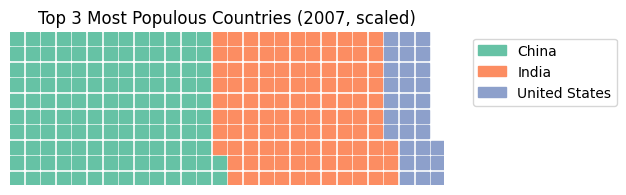

In [27]:
top3 = gapminder.nlargest(3, 'pop')[['country','pop']]
pop_scaled = (top3.set_index('country')['pop'] / 10**7).round().astype(int).to_dict()

fig = plt.figure(
    FigureClass=Waffle, rows=10, values=pop_scaled,
    title={'label': 'Top 3 Most Populous Countries (2007, scaled)', 'loc': 'center'},
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.05, 1)}
)
plt.show()


## **5.5.2: Top 5 most populous countries**

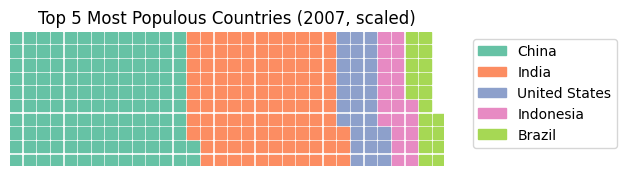

In [28]:
top5 = gapminder.nlargest(5, 'pop')[['country','pop']]
pop_scaled = (top5.set_index('country')['pop'] / 10**7).round().astype(int).to_dict()

fig = plt.figure(
    FigureClass=Waffle, rows=10, values=pop_scaled,
    title={'label': 'Top 5 Most Populous Countries (2007, scaled)', 'loc': 'center'},
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.05, 1)}
)
plt.show()

# **6. Steam Graph**
    
* Stacked area chart, where layers flow over time.

* Emphasizes changes in part‑to‑whole structure over time.

Typical use cases:

* Topic trends in text over years.

* Music genre popularity by decade.

* Weather type proportions by month.

In [29]:
!pip install vega_datasets
from vega_datasets import data
df = data.seattle_weather()
df['month'] = pd.to_datetime(df['date']).dt.month
df.head()


,date,precipitation,temp_max,temp_min,wind,weather,month
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,1
1,2012-01-02,10.9,10.6,2.8,4.5,rain,1
2,2012-01-03,0.8,11.7,7.2,2.3,rain,1
3,2012-01-04,20.3,12.2,5.6,4.7,rain,1
4,2012-01-05,1.3,8.9,2.8,6.1,rain,1


## **6.1: Stacked area by weather**

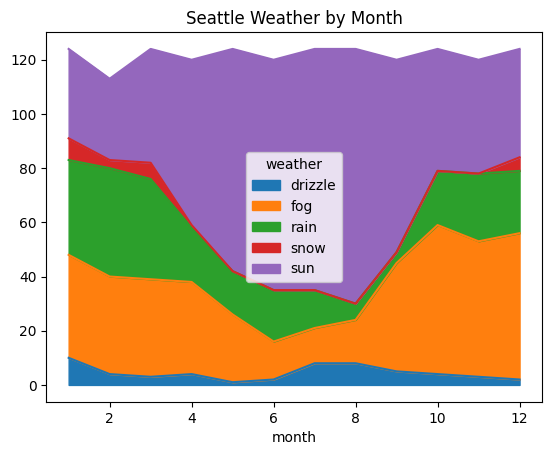

In [30]:
monthly = df.groupby(['month','weather']).size().unstack().fillna(0)
monthly.plot.area()
plt.title('Seattle Weather by Month')
plt.show()


## **6.2: Normalized stacked**

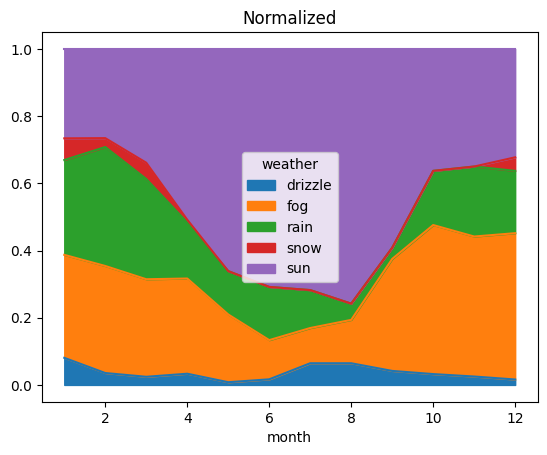

In [31]:
monthly.div(monthly.sum(axis=1), axis=0).plot.area()
plt.title('Normalized')
plt.show()


## **6.3 Monthly trend with smooth line (not steam graph)**

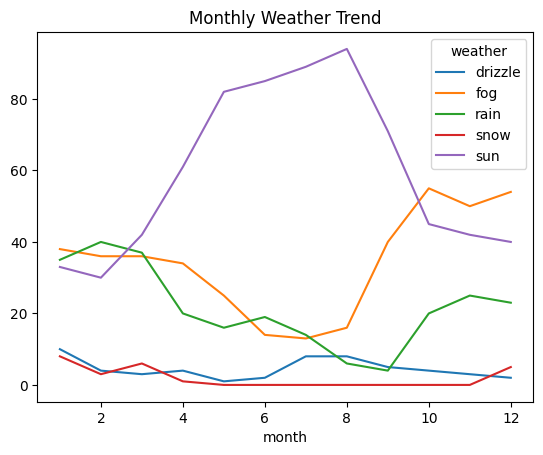

In [32]:
monthly.plot(kind='line')
plt.title('Monthly Weather Trend')
plt.show()


## **Steam-plot using overlapping plots: Possible?**

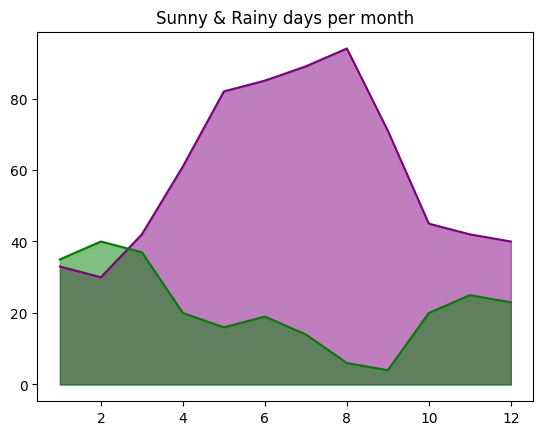

In [33]:
x = monthly.index
y1 = monthly['sun']
y2= monthly['rain']
plt.fill_between(x, y1, color="purple", alpha=0.5)
plt.fill_between(x, y2, color="green", alpha=0.5)
plt.plot(x, y1, color="purple")
plt.plot(x, y2, color="green")
plt.title('Sunny & Rainy days per month')
plt.show()


## **Summary**

| Plot         | Best for                           | Keep in mind                    |
| ------------ | ---------------------------------- | ------------------------------- |
| Grouping     | comparing categories together      | can get messy with many groups  |
| Faceting     | comparing distributions separately | needs enough data in each facet |
| Radar        | multi‑feature profiles             | don’t overuse >6–7 axes         |
| Matrix plot  | correlations, pivot tables         | choose good color scale         |
| Waffle       | parts of whole                     | max 5–7 categories              |
| Stream graph | time series composition            | needs enough time points        |


*Created by [Prachuryya Kaushik](https://www.iitg.ac.in/cse/student-pages/k.prachuryya) under the guidance of [Prof. Ashish Anand](https://www.iitg.ac.in/anand.ashish//)*